# Feature Enginnering e plotagem de gráficos

In [39]:
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format

import numpy as np

from sklearn.preprocessing import MinMaxScaler

import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", palette="pastel")

In [40]:
path = '..\data\snis_datasus_2019.csv'

In [41]:
def load_data( path ):
    return pd.read_csv(path, decimal = ',')

In [42]:
data = load_data(path)
data.shape

(5570, 27)

In [43]:
data.head(2)

,codigo_municipio_completo,Município,codigo_municipio_sem_digito,cityId,capital,country,codigo_tse,Estado,AG001 - População total atendida com abastecimento de água,IN006_AE - Tarifa média de esgoto,...,Obitos 1 a 3 anos escolaridade,Obitos 4 a 7 anos escolaridade,Obitos 8 a 11 anos escolaridade,Obitos 12 anos e mais escolaridade,Obitos Escolaridade Ignorada,Obitos Totais (com e sem escolaridade),Obitos Masc,Obitos Fem,Obitos Sexo Ignorado,Total obitos (Masc e Fem)
0,1100015,Alta Floresta D'Oeste,110001,5be344c0628a9e1c127931b8,0,Brazil,310,RO,2462.0,68.94,...,20,12,6,3,24,84.0,52,31,1,84.0
1,1100379,Alto Alegre dos Parecis,110037,5be344c0628a9e1c12791c3c,0,Brazil,736,RO,733.0,60.26,...,7,1,1,-,7,26.0,17,9,-,26.0


#

# Correção dos tipos de dados

In [44]:
data['POP_TOT - População total do município (Fonte: IBGE):'] = data['POP_TOT - População total do município (Fonte: IBGE):'].astype(int)
data['AG001 - População total atendida com abastecimento de água'] = data['AG001 - População total atendida com abastecimento de água'].astype(float)
data['IN006_AE - Tarifa média de esgoto'] = data['IN006_AE - Tarifa média de esgoto'].astype(float)
data['IN022_AE - Consumo médio percapita de água'] = data['IN022_AE - Consumo médio percapita de água'].astype(float)
data['IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água'] = data['IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água'].astype(float)
data['IN051_AE - Índice de perdas por ligação'] = data['IN051_AE - Índice de perdas por ligação'].astype(float)
data['IN052_AE - Índice de consumo de água'] = data['IN052_AE - Índice de consumo de água'].astype(float)
data['AG026 - População urbana atendida com abastecimento de água'] = data['AG026 - População urbana atendida com abastecimento de água'].astype(float)

#

# Verificar se existem cidades repetidas

In [45]:
len(data['codigo_municipio_sem_digito'].unique()) != len(data)

False

#

# Verificar a porcentagem de valores nulos

In [46]:
((data.isnull().sum())/data.shape[0])*100

codigo_municipio_completo                                                                      0.00
Município                                                                                      0.00
codigo_municipio_sem_digito                                                                    0.00
cityId                                                                                         0.00
capital                                                                                        0.00
country                                                                                        0.00
codigo_tse                                                                                     0.00
Estado                                                                                         0.00
AG001 - População total atendida com abastecimento de água                                     7.06
IN006_AE - Tarifa média de esgoto                                                              7.07


#

In [47]:
data.dropna(inplace=True)

#

Função para mostrar valores nos gráficos de barra

In [48]:
def show_values_on_bars( axs, h_v = "v", space = 0.4 ):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

#

Construção da coluna com dados de porcentagem da população atendida com abastecimento de água em cada município do Brasil

In [49]:
data['População_total_atendida_com_abastecimento_água(%)'] = data['AG001 - População total atendida com abastecimento de água']/data['POP_TOT - População total do município (Fonte: IBGE):']
data['População_total_atendida_com_abastecimento_água(%)'] = data['População_total_atendida_com_abastecimento_água(%)']*100

#

# Quantas cidades forneceram dados?

In [50]:
len(data['AG001 - População total atendida com abastecimento de água'])

5140

#

In [51]:
ab = data.loc[:, ['Município', 'Estado', 'População_total_atendida_com_abastecimento_água(%)', 'AG001 - População total atendida com abastecimento de água', 'POP_TOT - População total do município (Fonte: IBGE):']].sort_values(by = 'População_total_atendida_com_abastecimento_água(%)').reset_index(drop=True)

# ordena de forma decrescente
ab = ab[::-1]

#

# Quais são as 10 cidades com maior porcentagem de população atendida com abastecimento de água?

In [52]:
ab.head(10).reset_index(drop = True)

,Município,Estado,População_total_atendida_com_abastecimento_água(%),AG001 - População total atendida com abastecimento de água,POP_TOT - População total do município (Fonte: IBGE):
0,Geminiano,PI,378.00,"4,570.00",1209
1,Floriano Peixoto,RS,291.41,746.00,256
2,Nova Candelária,RS,288.78,"2,007.00",695
3,Mato Queimado,RS,273.35,"1,200.00",439
4,Boa Vista do Sul,RS,266.84,"1,046.00",392
5,Porto Vera Cruz,RS,258.20,834.00,323
6,Três Forquilhas,RS,244.38,870.00,356
7,João Costa,PI,240.17,"1,710.00",712
8,Lajeado do Bugre,RS,234.89,"1,710.00",728
9,Caraá,RS,225.56,"2,700.00",1197


#

# Quais são as 10 cidades com menor porcentagem de população atendida com abastecimento de água?

In [53]:
ab.tail(10).reset_index(drop = True)

,Município,Estado,População_total_atendida_com_abastecimento_água(%),AG001 - População total atendida com abastecimento de água,POP_TOT - População total do município (Fonte: IBGE):
0,Buriticupu,MA,2.07,820.00,39696
1,Arantina,MG,1.92,50.00,2607
2,Pedra Branca do Amapari,AP,1.63,149.00,9135
3,Nova Monte Verde,MT,1.33,60.00,4506
4,Porto Grande,AP,1.33,188.00,14128
5,Extremoz,RN,1.23,226.00,18345
6,Pão de Açúcar,AL,1.04,115.00,11035
7,Santa Cruz da Baixa Verde,PE,1.03,58.00,5646
8,São Félix do Xingu,PA,1.00,636.00,63457
9,Portel,PA,0.92,273.00,29554


#

# Quantas cidades estão entre 95 e 100% da população com abastecimento de água?

In [54]:
len(ab[(ab['População_total_atendida_com_abastecimento_água(%)'] > 95.0) & (ab['População_total_atendida_com_abastecimento_água(%)'] < 100.0)])

16

#

# Quais cidades estão entre 95 e 100% da população com abastecimento de água?

In [55]:
ab[(ab['População_total_atendida_com_abastecimento_água(%)'] > 95.0) & (ab['População_total_atendida_com_abastecimento_água(%)'] < 100.0)].reset_index(drop = True)

,Município,Estado,População_total_atendida_com_abastecimento_água(%),AG001 - População total atendida com abastecimento de água,POP_TOT - População total do município (Fonte: IBGE):
0,Icapuí,CE,99.97,"6,270.00",6272
1,Esperança Nova,PR,99.85,647.00,648
2,Xangri-lá,RS,99.25,"16,212.00",16335
3,Sinimbu,RS,99.17,"1,440.00",1452
4,São Pedro das Missões,RS,98.77,560.00,567
5,São Pedro do Butiá,RS,98.23,"1,218.00",1240
6,Pontal do Paraná,PR,98.21,"26,570.00",27053
7,Verdejante,PE,98.00,"2,751.00",2807
8,Tocos do Moji,MG,97.35,"1,029.00",1057
9,Paranaiguara,GO,97.25,"9,015.00",9270


#

# Qual é a distribuição do valor médio da tarifa de esgoto?

Text(0.5, 1.0, 'Tarifa média de esgoto em todos os municípios (R$/m³)')

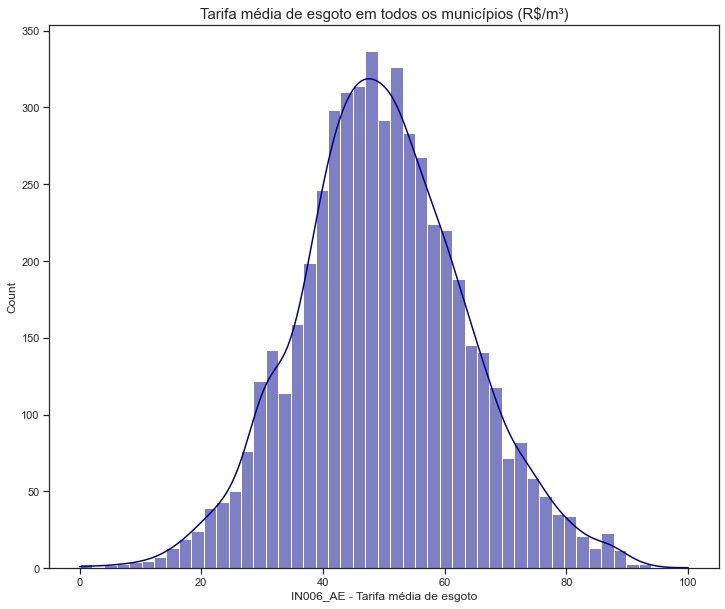

In [56]:
fig, ax = plt.subplots( figsize=(12, 10))

sns.histplot(x = 'IN006_AE - Tarifa média de esgoto', data = data.loc[:, ['IN006_AE - Tarifa média de esgoto']], color = "darkblue", kde = True)

ax.set_title('Tarifa média de esgoto em todos os municípios (R$/m³)', fontdict = {"size": 15})

In [57]:
data.loc[:, ['IN006_AE - Tarifa média de esgoto']].mean() # IN006_AE - Tarifa média de esgoto 49.75

IN006_AE - Tarifa média de esgoto   49.75
dtype: float64

#

# Índice de atendimento urbano de esgoto referido aos municípios atendidos com água

Text(0.5, 1.0, 'Índice de atendimento urbano de esgoto referido aos municípios atendidos com água (%)')

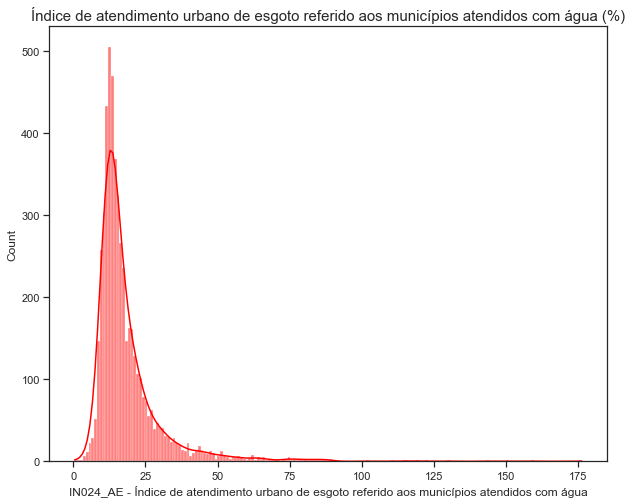

In [58]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.histplot(x = 'IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água', kde = True, data = data.loc[:, ['IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água']], color = 'red')

ax.set_title('Índice de atendimento urbano de esgoto referido aos municípios atendidos com água (%)', fontdict={"size": 15})

A média de atendimento urbano de esgoto referido aos municípios atendidos com água é de 18,54%

#

# Consumo médio de água per capita por estado

In [59]:
average_water_consumption_state = data[['Estado', 'IN022_AE - Consumo médio percapita de água']].groupby(['Estado']).mean().reset_index()

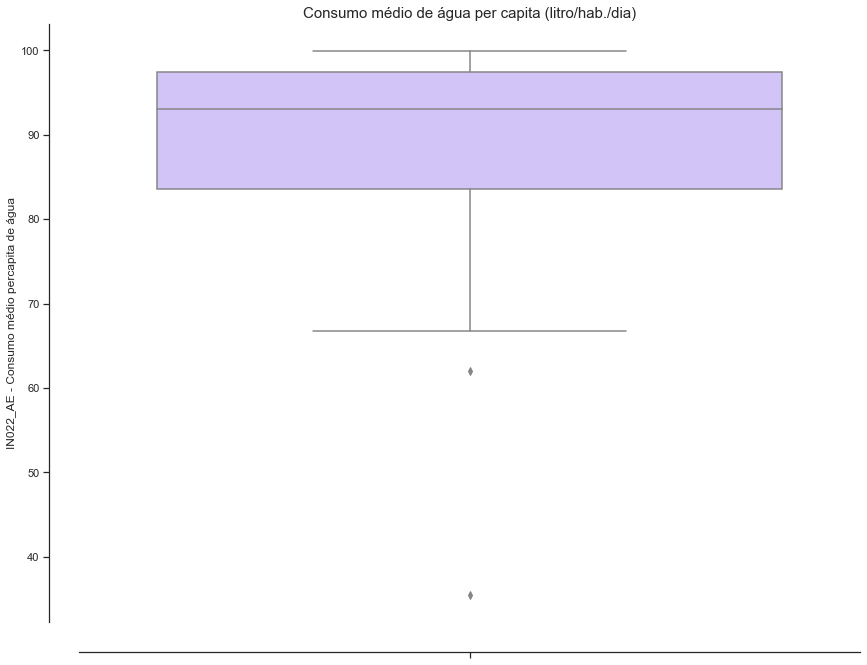

In [60]:
fig, ax = plt.subplots(figsize=(14, 11))

sns.boxplot(y = 'IN022_AE - Consumo médio percapita de água', data = average_water_consumption_state, color = 'm')

sns.despine(offset=30)

ax.set_title('Consumo médio de água per capita (litro/hab./dia)', fontdict = {"size": 15})

del average_water_consumption_state

#

# Porcentagem da população total atendida com abastecimento de água

In [61]:
db = data.loc[:, ['AG001 - População total atendida com abastecimento de água', 'POP_TOT - População total do município (Fonte: IBGE):']].copy()
db.dropna(inplace = True)

In [62]:
a = db['AG001 - População total atendida com abastecimento de água'].copy()
b = db['POP_TOT - População total do município (Fonte: IBGE):'].copy()

db_pop = (a/b)*100

del db, a, b

db_pop = pd.DataFrame(db_pop, columns = ['Porcentagem total da população atendida com abastecimento de água'])
db_pop['Município'] = data['Município'].copy()
db_pop['Estado'] = data['Estado'].copy()

db_pop = db_pop.sort_values(by = 'Porcentagem total da população atendida com abastecimento de água').reset_index()
db_pop.drop(columns=['index'], inplace = True)
db_pop = db_pop.iloc[::-1]

#y = db_pop.iloc[115:125, :]

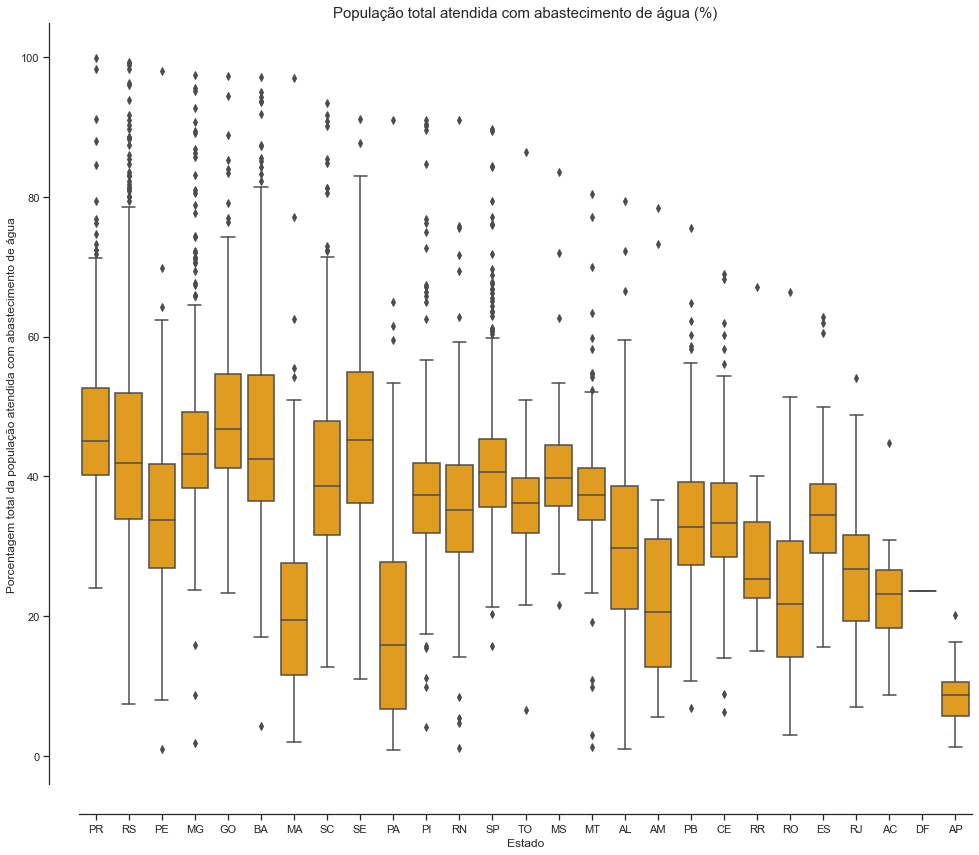

In [63]:
# retirei os valores acima de 100%
aux = db_pop.iloc[115:, :]

a = 'Estado'
b = 'Porcentagem total da população atendida com abastecimento de água'

fig, ax = plt.subplots(figsize=(16, 14))

sns.boxplot(x = a, y = b, data = aux, color = 'orange')

sns.despine(offset=30)

ax.set_title('População total atendida com abastecimento de água (%)', fontdict = {"size": 15})

del a, b

#

# Qual o índice de perdas por ligação por estado?

In [64]:
db = data[['Estado', 'IN051_AE - Índice de perdas por ligação', 'IN052_AE - Índice de consumo de água']].groupby('Estado').mean().reset_index()

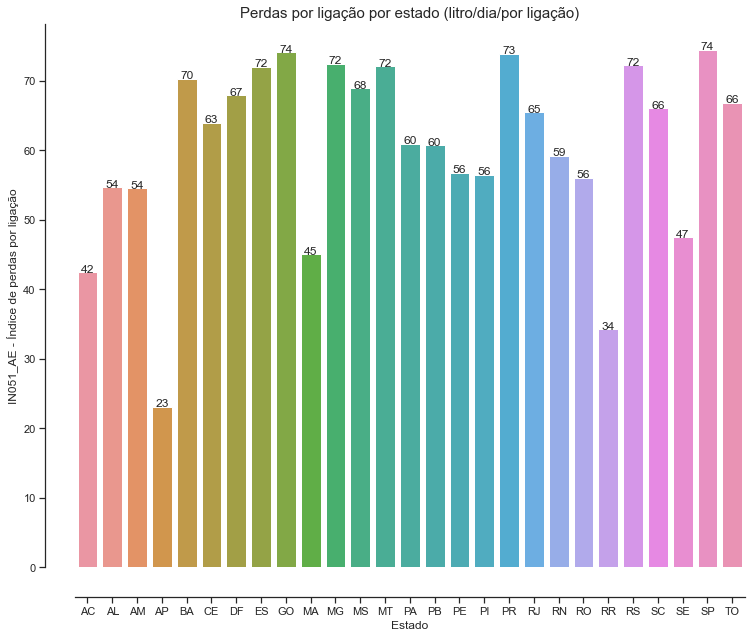

In [65]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.barplot(x = 'Estado',  y = 'IN051_AE - Índice de perdas por ligação', data = db)

sns.despine(offset=30)

ax.set_title('Perdas por ligação por estado (litro/dia/por ligação)', fontdict = {"size": 15})

show_values_on_bars(ax)

#

# Consumo de água por estado

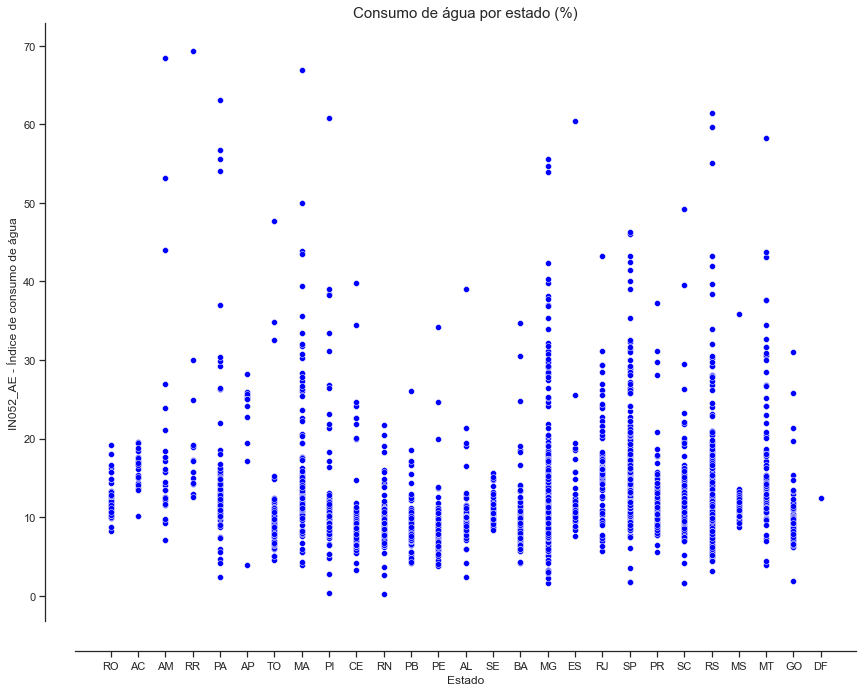

In [66]:
fig, ax = plt.subplots(figsize=(14, 11))

sns.scatterplot(data = data, x = "Estado", y = "IN052_AE - Índice de consumo de água", color = 'blue')
sns.despine(offset=30)

ax.set_title('Consumo de água por estado (%)', fontdict = {"size": 15})

show_values_on_bars(ax)

#

In [67]:
deaths = data.loc[:, ['Município', 'Estado', 'Obitos Nenhuma escolaridade', 'Obitos 1 a 3 anos escolaridade',
                    'Obitos 4 a 7 anos escolaridade', 'Obitos 8 a 11 anos escolaridade',
                    'Obitos 12 anos e mais escolaridade', 'Obitos Escolaridade Ignorada',
                    'Obitos Totais (com e sem escolaridade)', 'Obitos Masc', 'Obitos Fem',
                    'Obitos Sexo Ignorado', 'Total obitos (Masc e Fem)']]

In [68]:
deaths.replace('-', np.nan, inplace = True)
deaths.dropna(inplace = True)

deaths = deaths.reset_index()
deaths.drop('index', axis = 1, inplace = True)

correção do tipo de dado para óbitos

In [69]:
try:    
    deaths['Obitos Nenhuma escolaridade'] = deaths['Obitos Nenhuma escolaridade'].astype(int)
    deaths['Obitos 1 a 3 anos escolaridade'] = deaths['Obitos 1 a 3 anos escolaridade'].astype(int)
    deaths['Obitos 4 a 7 anos escolaridade'] = deaths['Obitos 4 a 7 anos escolaridade'].astype(int)
    deaths['Obitos 8 a 11 anos escolaridade'] = deaths['Obitos 8 a 11 anos escolaridade'].astype(int)
    deaths['Obitos 12 anos e mais escolaridade'] = deaths['Obitos 12 anos e mais escolaridade'].astype(int)
    deaths['Obitos Escolaridade Ignorada'] = deaths['Obitos Escolaridade Ignorada'].astype(int)
    deaths['Obitos Totais (com e sem escolaridade)'] = deaths['Obitos Totais (com e sem escolaridade)'].astype(float)
    deaths['Obitos Totais (com e sem escolaridade)'] = deaths['Obitos Totais (com e sem escolaridade)'].astype(int)
    deaths['Obitos Masc'] = deaths['Obitos Masc'].astype(int)
    deaths['Obitos Fem'] = deaths['Obitos Fem'].astype(int)
    deaths['Obitos Sexo Ignorado'] = deaths['Obitos Sexo Ignorado'].astype(int)
    deaths['Total obitos (Masc e Fem)'] = deaths['Total obitos (Masc e Fem)'].astype(float)

except Exception as e:
    print("Falha em converter tipos em deaths\n")
    print(e)

#

In [ ]:
## transformar 3 colunas em apenas uma e criar uma nova com suas respectivas labels

women_men_deaths = deaths.loc[:, ['Obitos Masc', 'Obitos Fem', 'Obitos Sexo Ignorado', 'Município', 'Estado']]
men = women_men_deaths.iloc[:, [0]]
women = women_men_deaths.iloc[:, [1]]
ign = women_men_deaths.iloc[:, [2]]

men['kind'] = men.columns[0]
men.columns = ['Valor', 'kind']

women['kind'] = women.columns[0]
women.columns = ['Valor', 'kind']

ign['kind'] = ign.columns[0]
ign.columns = ['Valor', 'kind']

women_men_deaths_final = pd.concat([women, men, ign], axis = 0).reset_index()
women_men_deaths_final.drop(['index'], axis = 1, inplace=True)

# Qual o índice de óbitos femininos, masculinos e quando o sexo é ignorado?

In [71]:
fig = px.pie(values = women_men_deaths_final['Valor'], names = women_men_deaths_final['kind'], color_discrete_sequence=px.colors.sequential.RdBu) 
fig.show()

#

# Quais são as porções de óbitos de acordo com a escolaridade?

In [ ]:
# modelagem dos dados de 6 colunas para 1 e cria uma nova coluna com suas respectivas labels

deaths_from_schooling = deaths.loc[:, ['Obitos Nenhuma escolaridade', 'Obitos 1 a 3 anos escolaridade',
                                    'Obitos 4 a 7 anos escolaridade', 'Obitos 8 a 11 anos escolaridade',
                                    'Obitos 12 anos e mais escolaridade', 'Obitos Escolaridade Ignorada']]

a = deaths_from_schooling.iloc[:, [0]]
b = deaths_from_schooling.iloc[:, [1]]
c = deaths_from_schooling.iloc[:, [2]]
d = deaths_from_schooling.iloc[:, [3]]
e = deaths_from_schooling.iloc[:, [4]]
f = deaths_from_schooling.iloc[:, [5]]

a['kind'] = a.columns[0]
a.columns = ['Valor', 'kind']

b['kind'] = b.columns[0]
b.columns = ['Valor', 'kind']

c['kind'] = c.columns[0]
c.columns = ['Valor', 'kind']

d['kind'] = d.columns[0]
d.columns = ['Valor', 'kind']

e['kind'] = e.columns[0]
e.columns = ['Valor', 'kind']

f['kind'] = f.columns[0]
f.columns = ['Valor', 'kind']

deaths_from_schooling_final = pd.concat([a,b,c,d,e,f], axis = 0).reset_index()
deaths_from_schooling_final.drop(['index'], axis = 1, inplace=True)

In [73]:
fig = px.pie(values =deaths_from_schooling_final['Valor'], names = deaths_from_schooling_final['kind'], color_discrete_sequence=px.colors.sequential.RdBu) 
fig.show()

#

# Correlação entre as variáveis

# Renomear colunas para melhor visualização da matriz de correlação de Pearson

In [74]:
new_data = data.copy()

new_data = new_data.loc[:, ['AG001 - População total atendida com abastecimento de água',
                            'IN006_AE - Tarifa média de esgoto',
                            'IN022_AE - Consumo médio percapita de água',
                            'IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água',
                            'IN051_AE - Índice de perdas por ligação',
                            'IN052_AE - Índice de consumo de água',
                            'AG026 - População urbana atendida com abastecimento de água',
                            'POP_TOT - População total do município (Fonte: IBGE):',
                            'Obitos Nenhuma escolaridade', 'Obitos 1 a 3 anos escolaridade',
                            'Obitos 4 a 7 anos escolaridade', 'Obitos 8 a 11 anos escolaridade',
                            'Obitos 12 anos e mais escolaridade', 'Obitos Escolaridade Ignorada',
                            'Obitos Totais (com e sem escolaridade)', 'Obitos Masc', 'Obitos Fem',
                            'Obitos Sexo Ignorado', 'Total obitos (Masc e Fem)'
                        ]]

In [75]:
# renomear colunas para melhor visualização da Matriz de Correlação

names = ['População total atendida com abastecimento de água ',
        'Tarifa média de esgoto ',
        'Consumo médio percapita de água ',
        'Atendimento urbano de esgoto referido aos municípios atendidos com água ',
        'Perdas por ligação ',
        'Consumo de água ',
        'População urbana atendida com abastecimento de água ',
        'População total do município (Fonte: IBGE) ',
        'Obitos Nenhuma escolaridade ', 'Obitos 1 a 3 anos escolaridade ',
        'Obitos 4 a 7 anos escolaridade', 'Obitos 8 a 11 anos escolaridade ',
        'Obitos 12 anos e mais escolaridade', 'Obitos Escolaridade Ignorada ',
        'Obitos Totais (com e sem escolaridade) ', 'Obitos Masc ', 'Obitos Fem ',
        'Obitos Sexo Ignorado', 'Total obitos (Masc e Fem) ',
       ]

new_data.columns = names

<AxesSubplot:>

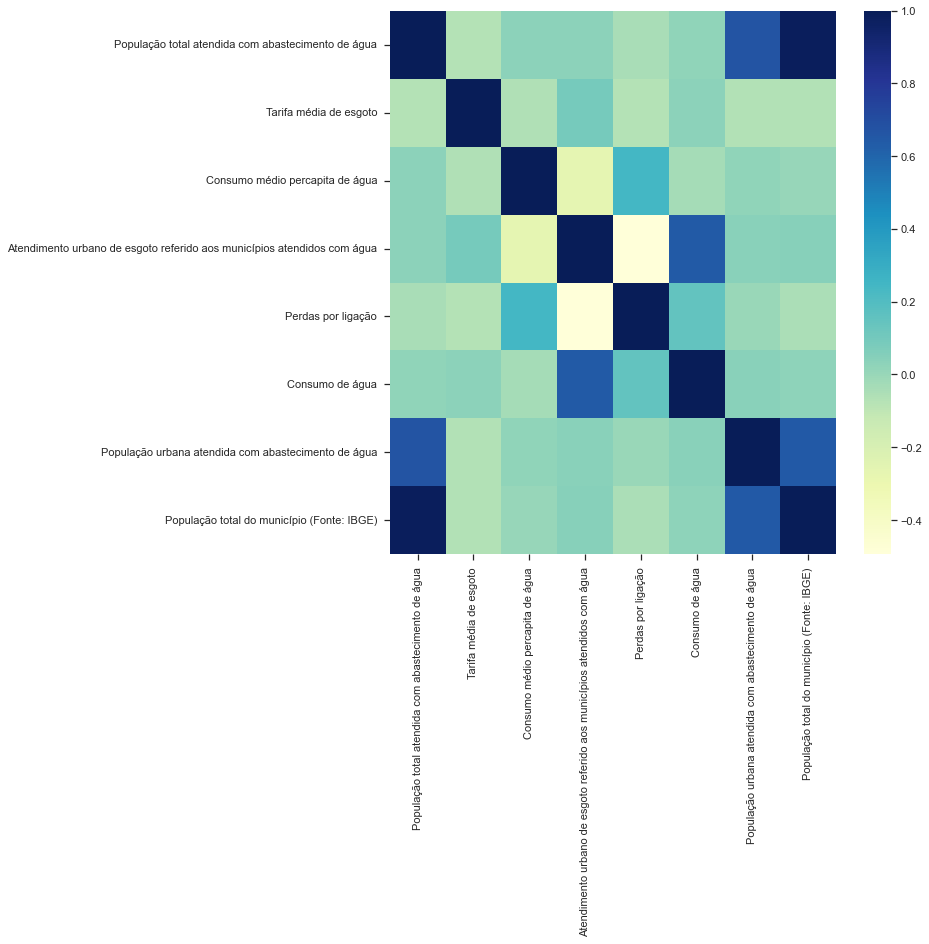

In [76]:
fig, ax = plt.subplots( figsize=(10, 10))
sns.heatmap(new_data.corr(), cmap="YlGnBu")